# Import libraries and read the data

In [1]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import time
import psutil

In [3]:
start_time = time.time()

In [4]:
spark = SparkSession.builder.appName("BigDataEND").getOrCreate()

In [5]:
df = spark.read.option('header','true').csv('/content/hotel_bookings.csv' ,inferSchema =True)
df2 = spark.read.option('header','true').csv('/content/hotel_bookings.csv' ,inferSchema =True)

In [6]:
df.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: string (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullab

# Preproceccing

In [7]:
df.show()

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+------+---------------------------+-------------------------+------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|   adr|required_car_parking_spaces|to

In [8]:
df.describe().show()

+-------+------------+-------------------+------------------+------------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------------------+-------------------+--------------------+---------+-------+--------------+--------------------+-------------------+----------------------+------------------------------+------------------+------------------+-------------------+------------+------------------+------------------+--------------------+---------------+------------------+---------------------------+-------------------------+------------------+
|summary|       hotel|        is_canceled|         lead_time| arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|            adults|           children|              babies|     meal|country|market_segment|distribution_channel|  is_repeated_guest|previous_cancellations|previous_bookings_not_canc

In [9]:
display(df.filter(' agent == "NULL"').count())

16340

In [10]:
display(df.filter(' company == "NULL"').count())

112593

In [11]:
display(df.filter(' country == "NULL"').count())

488

In [12]:
display(df.filter(' children == "NULL"').count())

0

In [13]:
df = df.drop('company')
df = df.drop('reservation_status')

In [14]:
null_children_count = df.filter(df['children'] == 'NULL').count()
print(f"Number of rows with 'NULL' as children: {null_children_count}")

# Drop rows where 'children' is 'NULL'
df = df.filter(df['children'] != 'NULL')

# Count rows with 'NULL' as children after dropping
null_children_count_after = df.filter(df['children'] == 'NULL').count()
print(f"Number of rows with 'NULL' as children after filtering: {null_children_count_after}")

df.show()

Number of rows with 'NULL' as children: 0
Number of rows with 'NULL' as children after filtering: 0
+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+-------------+------+---------------------------+-------------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|days_in

In [15]:
display(df.filter(' agent == "NULL"').count())

16340

In [16]:
null_agent_count = df.filter(df['agent'] == 'NULL').count()
print(f"Number of rows with 'NULL' as agent: {null_agent_count}")

# Drop rows where 'agent' is 'NULL'
df = df.filter(df['agent'] != 'NULL')

# Count rows with 'NULL' as agent after dropping
null_agent_count_after = df.filter(df['agent'] == 'NULL').count()
print(f"Number of rows with 'NULL' as agent after filtering: {null_agent_count_after}")

df.show()

Number of rows with 'NULL' as agent: 16340
Number of rows with 'NULL' as agent after filtering: 0
+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+-------------+------+---------------------------+-------------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|days_in_w

In [17]:
null_country_count = df.filter(df['country'] == 'NULL').count()
print(f"Number of rows with 'NULL' as country: {null_country_count}")

# Drop rows where 'country' is 'NULL'
df = df.filter(df['country'] != 'NULL')

# Count rows with 'NULL' as country after dropping
null_country_count_after = df.filter(df['country'] == 'NULL').count()
print(f"Number of rows with 'NULL' as country after filtering: {null_country_count_after}")

df.show()

Number of rows with 'NULL' as country: 154
Number of rows with 'NULL' as country after filtering: 0
+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+-------------+------+---------------------------+-------------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|days_in

In [18]:
from pyspark.sql import functions as F

for column in df.columns:
    count_null = df.filter(F.col(column) == "NULL").count()
    print(f"Column '{column}' has {count_null} rows with value 'NULL'.")

Column 'hotel' has 0 rows with value 'NULL'.
Column 'is_canceled' has 0 rows with value 'NULL'.
Column 'lead_time' has 0 rows with value 'NULL'.
Column 'arrival_date_year' has 0 rows with value 'NULL'.
Column 'arrival_date_month' has 0 rows with value 'NULL'.
Column 'arrival_date_week_number' has 0 rows with value 'NULL'.
Column 'arrival_date_day_of_month' has 0 rows with value 'NULL'.
Column 'stays_in_weekend_nights' has 0 rows with value 'NULL'.
Column 'stays_in_week_nights' has 0 rows with value 'NULL'.
Column 'adults' has 0 rows with value 'NULL'.
Column 'children' has 0 rows with value 'NULL'.
Column 'babies' has 0 rows with value 'NULL'.
Column 'meal' has 0 rows with value 'NULL'.
Column 'country' has 0 rows with value 'NULL'.
Column 'market_segment' has 0 rows with value 'NULL'.
Column 'distribution_channel' has 0 rows with value 'NULL'.
Column 'is_repeated_guest' has 0 rows with value 'NULL'.
Column 'previous_cancellations' has 0 rows with value 'NULL'.
Column 'previous_booking

# EDA

In [19]:
df = df.toPandas()
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0         13               2015   
1       Resort Hotel            0         14               2015   
2       Resort Hotel            0         14               2015   
3       Resort Hotel            0          9               2015   
4       Resort Hotel            1         85               2015   
...              ...          ...        ...                ...   
102891    City Hotel            0         23               2017   
102892    City Hotel            0        102               2017   
102893    City Hotel            0         34               2017   
102894    City Hotel            0        109               2017   
102895    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
102891             August                        35   
102892             August                        35   
102893             August                        35   
102894             August                        35   
102895             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
102891                         30                        2   
102892                         31                        2   
102893                         31                        2   
102894                         31                        2   
102895                         29                        2   

        stays_in_week_nights  adults  ... assigned_room_type  booking_changes  \
0                          1       1  ...                  A                0   
1                          2       2  ...                  A                0   
2                          2       2  ...                  A                0   
3                          2       2  ...                  C                0   
4                          3       2  ...                  A                0   
...                      ...     ...  ...                ...              ...   
102891                     5       2  ...                  A                0   
102892                     5       3  ...                  E                0   
102893                     5       2  ...                  D                0   
102894                     5       2  ...                  A                0   
102895                     7       2  ...                  A                0   

       deposit_type agent days_in_waiting_list customer_type     adr  \
0        No Deposit   304                    0     Transient   75.00   
1        No Deposit   240                    0     Transient   98.00   
2        No Deposit   240                    0     Transient   98.00   
3        No Deposit   303                    0     Transient  103.00   
4        No Deposit   240                    0     Transient   82.00   
...             ...   ...                  ...           ...     ...   
102891   No Deposit   394                    0     Transient   96.14   
102892   No Deposit     9                    0     Transient  225.43   
102893   No Deposit     9                    0     Transient  157.71   
102894   No Deposit    89                    0     Transient  104.40   
102895   No Deposit     9              

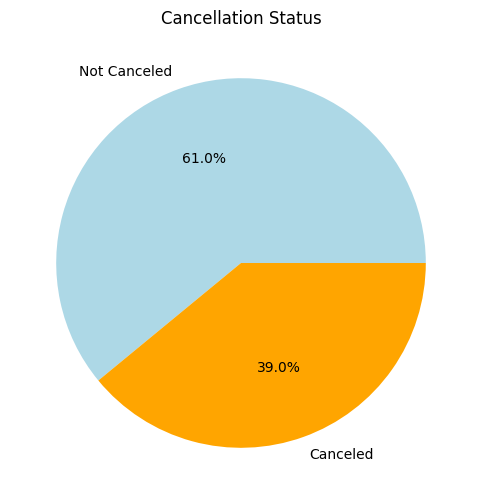

In [20]:
# Calculate the counts of each category
canceled_counts = df['is_canceled'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(canceled_counts, labels=['Not Canceled', 'Canceled'], autopct='%1.1f%%', colors=['lightblue', 'orange'])

# Add a title
plt.title('Cancellation Status')

# Show the plot
plt.show()


In [21]:
fig = px.histogram(df, x='lead_time', color='is_canceled', barmode='overlay')

# Show the plot
fig.show()

In [22]:
sns.histplot(data=df, x='lead_time', hue='is_canceled')


<Axes: xlabel='lead_time', ylabel='Count'>

In [23]:
sns.countplot(data=df, x='is_canceled', hue='market_segment')

<Axes: xlabel='is_canceled', ylabel='count'>

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='reserved_room_type', hue='is_canceled')
plt.title('Count of is_canceled by reserved_room_type')
plt.xticks(rotation=45)
plt.show()

In [25]:
import plotly.express as px

fig = px.histogram(
    df,
    x='reserved_room_type',
    color='is_canceled',
    barmode='group',
    title='Count of is_canceled by reserved_room_type'
)

fig.update_layout(
    xaxis_title='Reserved Room Type',
    yaxis_title='Count',
    xaxis={'categoryorder':'total descending'},
    xaxis_tickangle=-45,
    bargap=0.1,  # Adjusts the gap between bars
    width=1000,  # Width of the figure
    height=600   # Height of the figure
)

fig.show()


In [26]:
room_type_a = df[df['reserved_room_type'] == 'D']
total_bookings_a = room_type_a.shape[0]
canceled_bookings_a = room_type_a[room_type_a['is_canceled'] == 1].shape[0]
cancellation_percentage_a = (canceled_bookings_a / total_bookings_a) * 100
print(f"Percentage of cancellations for room type A: {cancellation_percentage_a:.2f}%")


Percentage of cancellations for room type A: 33.16%


In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.title('Count of is_canceled by hotel')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='is_canceled', ylabel='count'>

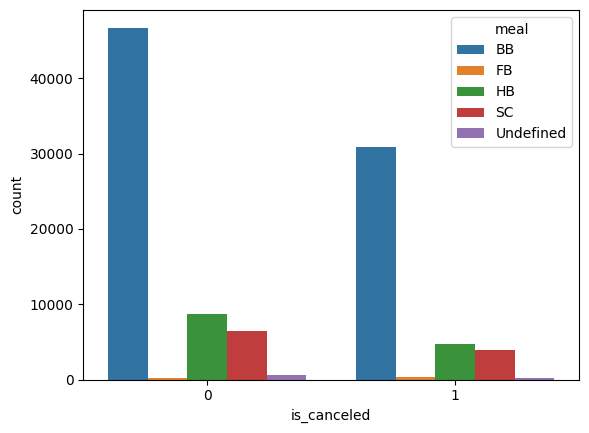

In [28]:
sns.countplot(data=df, x='is_canceled', hue='meal')

In [29]:
meal_replacements = {
    'BB': 'Bed and Breakfast',
    'FB': 'Full Board',
    'HB': 'Half Board',
    'SC': 'Self Catering',
    'Undefined': 'No Meal Plan'
}

# Replace the values in the 'meal' column
df['meal'] = df['meal'].replace(meal_replacements)

In [30]:
room_type_a = df[df['meal'] == 'Self Catering']
total_bookings_a = room_type_a.shape[0]
canceled_bookings_a = room_type_a[room_type_a['is_canceled'] == 1].shape[0]
cancellation_percentage_a = (canceled_bookings_a / total_bookings_a) * 100
print(f"Percentage of cancellations for room type A: {cancellation_percentage_a:.2f}%")


Percentage of cancellations for room type A: 38.00%


In [31]:
sns.countplot(data=df, x='is_canceled', hue='meal')

<Axes: xlabel='is_canceled', ylabel='count'>

In [32]:
df = spark.createDataFrame(df)
df.show()

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+-----------------+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+-------------+------+---------------------------+-------------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|             meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|days_in_waiting_list|customer_type|   adr|required_car_parking_spaces|total_of_sp

# Feature Engineering:

In [33]:
# Print each column name on a new line
for col in df.columns:
    print(col)


hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status_date


In [34]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [35]:
df

DataFrame[hotel: string, is_canceled: bigint, lead_time: bigint, arrival_date_year: bigint, arrival_date_month: string, arrival_date_week_number: bigint, arrival_date_day_of_month: bigint, stays_in_weekend_nights: bigint, stays_in_week_nights: bigint, adults: bigint, children: string, babies: bigint, meal: string, country: string, market_segment: string, distribution_channel: string, is_repeated_guest: bigint, previous_cancellations: bigint, previous_bookings_not_canceled: bigint, reserved_room_type: string, assigned_room_type: string, booking_changes: bigint, deposit_type: string, agent: string, days_in_waiting_list: bigint, customer_type: string, adr: double, required_car_parking_spaces: bigint, total_of_special_requests: bigint, reservation_status_date: date]

In [37]:
hotel_indexer = StringIndexer(inputCol="hotel", outputCol="hotelIndex").fit(df)
arrival_date_month_indexer = StringIndexer(inputCol="arrival_date_month", outputCol="arrival_date_monthIndex").fit(df)
meal_indexer = StringIndexer(inputCol="meal", outputCol="mealIndex").fit(df)
market_segment_indexer = StringIndexer(inputCol="market_segment", outputCol="market_segmentIndex").fit(df)
country_indexer = StringIndexer(inputCol="country", outputCol="countryIndex").fit(df)
deposit_type_indexer = StringIndexer(inputCol="deposit_type", outputCol="deposit_typeIndex").fit(df)
customer_type_indexer = StringIndexer(inputCol="customer_type", outputCol="customer_typeIndex").fit(df)
distribution_channel_indexer = StringIndexer(inputCol="distribution_channel", outputCol="distribution_channelIndex").fit(df)
reserved_room_type_indexer = StringIndexer(inputCol="reserved_room_type", outputCol="reserved_room_typeIndex").fit(df)
assigned_room_type_indexer = StringIndexer(inputCol="assigned_room_type", outputCol="assigned_room_typeIndex").fit(df)


In [38]:
df = hotel_indexer.transform(df)
df = arrival_date_month_indexer.transform(df)
df = meal_indexer.transform(df)
df = market_segment_indexer.transform(df)
df = country_indexer.transform(df)
df = deposit_type_indexer.transform(df)
df = customer_type_indexer.transform(df)
df = distribution_channel_indexer.transform(df)
df = reserved_room_type_indexer.transform(df)
df = assigned_room_type_indexer.transform(df)
df.show()

+------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+-----------------+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+--------------------+-------------+------+---------------------------+-------------------------+-----------------------+----------+-----------------------+---------+-------------------+------------+-----------------+------------------+-------------------------+-----------------------+-----------------------+
|       hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|             meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellati

In [39]:
df = df.drop('hotel','arrival_date_month','meal','market_segment','country','room_type','deposit_type','customer_type','distribution_channel' , 'reservation_status_date')

In [40]:
df.show()


+-----------+---------+-----------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+-----+--------------------+------+---------------------------+-------------------------+----------+-----------------------+---------+-------------------+------------+-----------------+------------------+-------------------------+-----------------------+-----------------------+
|is_canceled|lead_time|arrival_date_year|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|agent|days_in_waiting_list|   adr|required_car_parking_spaces|total_of_special_requests|hotelIndex|arrival_date_monthIndex|mealIndex|market_segmentInd

In [41]:
df.dtypes

[('is_canceled', 'bigint'),
 ('lead_time', 'bigint'),
 ('arrival_date_year', 'bigint'),
 ('arrival_date_week_number', 'bigint'),
 ('arrival_date_day_of_month', 'bigint'),
 ('stays_in_weekend_nights', 'bigint'),
 ('stays_in_week_nights', 'bigint'),
 ('adults', 'bigint'),
 ('children', 'string'),
 ('babies', 'bigint'),
 ('is_repeated_guest', 'bigint'),
 ('previous_cancellations', 'bigint'),
 ('previous_bookings_not_canceled', 'bigint'),
 ('reserved_room_type', 'string'),
 ('assigned_room_type', 'string'),
 ('booking_changes', 'bigint'),
 ('agent', 'string'),
 ('days_in_waiting_list', 'bigint'),
 ('adr', 'double'),
 ('required_car_parking_spaces', 'bigint'),
 ('total_of_special_requests', 'bigint'),
 ('hotelIndex', 'double'),
 ('arrival_date_monthIndex', 'double'),
 ('mealIndex', 'double'),
 ('market_segmentIndex', 'double'),
 ('countryIndex', 'double'),
 ('deposit_typeIndex', 'double'),
 ('customer_typeIndex', 'double'),
 ('distribution_channelIndex', 'double'),
 ('reserved_room_typeInde

In [42]:
df = df.toPandas()
df.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                           object
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
agent                              object
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
hotelIndex                        float64
arrival_date_monthIndex           float64
mealIndex                         float64
market_segmentIndex               float64
countryIndex                      float64
deposit_typeIndex                 float64
customer_typeIndex                float64
distribution_channelIndex         float64
reserved_room_typeIndex           float64
assigned_room_typeIndex           float64
dtype: object

In [43]:
df['assigned_room_type'].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'K'], dtype=object)

In [44]:
df['reserved_room_type'].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'H', 'B'], dtype=object)

In [45]:
replacement_mapping = {
    'A': 0,
    'C': 1,
    'D': 2,
    'E': 3,
    'G': 4,
    'H': 5,
    'L': 6,
    'P': 7,
    'K':8,
    'I':9,
    'F':10,
    'B':11,
}

df['reserved_room_type'] = df['reserved_room_type'].replace(replacement_mapping)

df['assigned_room_type'] = df['assigned_room_type'].replace(replacement_mapping)

In [46]:
df['assigned_room_type'].unique()

array([ 0,  1,  2,  3,  4, 10,  9, 11,  5,  8])

In [47]:
df['reserved_room_type'].unique()

array([ 0,  1,  2,  3,  4, 10,  5, 11])

In [48]:
df['assigned_room_type']

0         0
1         0
2         0
3         1
4         0
         ..
102891    0
102892    3
102893    2
102894    0
102895    0
Name: assigned_room_type, Length: 102896, dtype: int64

In [49]:
df['agent'] = df['agent'].astype(int)
df['reserved_room_type'] = df['reserved_room_type'].astype(int)
df['assigned_room_type'] = df['assigned_room_type'].astype(int)


In [50]:
df['children'] = df['children'].dropna()

In [51]:
df['children'].replace('NA', -1, inplace=True)

In [52]:
df['children'].unique()

array(['0', '1', '2', '10', '3', -1], dtype=object)

In [53]:
df['children'] = df['children'].astype(int)

In [54]:
df = spark.createDataFrame(df)

In [55]:
df.dtypes

[('is_canceled', 'bigint'),
 ('lead_time', 'bigint'),
 ('arrival_date_year', 'bigint'),
 ('arrival_date_week_number', 'bigint'),
 ('arrival_date_day_of_month', 'bigint'),
 ('stays_in_weekend_nights', 'bigint'),
 ('stays_in_week_nights', 'bigint'),
 ('adults', 'bigint'),
 ('children', 'bigint'),
 ('babies', 'bigint'),
 ('is_repeated_guest', 'bigint'),
 ('previous_cancellations', 'bigint'),
 ('previous_bookings_not_canceled', 'bigint'),
 ('reserved_room_type', 'bigint'),
 ('assigned_room_type', 'bigint'),
 ('booking_changes', 'bigint'),
 ('agent', 'bigint'),
 ('days_in_waiting_list', 'bigint'),
 ('adr', 'double'),
 ('required_car_parking_spaces', 'bigint'),
 ('total_of_special_requests', 'bigint'),
 ('hotelIndex', 'double'),
 ('arrival_date_monthIndex', 'double'),
 ('mealIndex', 'double'),
 ('market_segmentIndex', 'double'),
 ('countryIndex', 'double'),
 ('deposit_typeIndex', 'double'),
 ('customer_typeIndex', 'double'),
 ('distribution_channelIndex', 'double'),
 ('reserved_room_typeInde

In [56]:
df.show()

+-----------+---------+-----------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+-----+--------------------+------+---------------------------+-------------------------+----------+-----------------------+---------+-------------------+------------+-----------------+------------------+-------------------------+-----------------------+-----------------------+
|is_canceled|lead_time|arrival_date_year|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|agent|days_in_waiting_list|   adr|required_car_parking_spaces|total_of_special_requests|hotelIndex|arrival_date_monthIndex|mealIndex|market_segmentInd

SelectFromModel

In [57]:
df = df.toPandas()
df

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0                 0         13               2015                        27   
1                 0         14               2015                        27   
2                 0         14               2015                        27   
3                 0          9               2015                        27   
4                 1         85               2015                        27   
...             ...        ...                ...                       ...   
102891            0         23               2017                        35   
102892            0        102               2017                        35   
102893            0         34               2017                        35   
102894            0        109               2017                        35   
102895            0        205               2017                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
102891                         30                        2   
102892                         31                        2   
102893                         31                        2   
102894                         31                        2   
102895                         29                        2   

        stays_in_week_nights  adults  children  babies  ...  hotelIndex  \
0                          1       1         0       0  ...         1.0   
1                          2       2         0       0  ...         1.0   
2                          2       2         0       0  ...         1.0   
3                          2       2         0       0  ...         1.0   
4                          3       2         0       0  ...         1.0   
...                      ...     ...       ...     ...  ...         ...   
102891                     5       2         0       0  ...         0.0   
102892                     5       3         0       0  ...         0.0   
102893                     5       2         0       0  ...         0.0   
102894                     5       2         0       0  ...         0.0   
102895                     7       2         0       0  ...         0.0   

        arrival_date_monthIndex  mealIndex  market_segmentIndex  countryIndex  \
0                           1.0        0.0                  4.0           1.0   
1                           1.0        0.0                  0.0           1.0   
2                           1.0        0.0                  0.0           1.0   
3                           1.0        4.0                  3.0           0.0   
4                           1.0        0.0                  0.0           0.0   
...                         ...        ...                  ...           ...   
102891                      0.0        0.0                  1.0           7.0   
102892                      0.0        0.0                  0.0           2.0   
102893                      0.0        0.0                  0.0           4.0   
102894                      0.0        0.0                  0.0           1.0   
102895                      0.0        1.0                  0.0           4.0   

        deposit_typeIndex  customer_typeIndex  distribution_channelIndex  \
0                     0.0                 0.0                        2.0   
1                     0.0                 0.0                        0.0   
2                     0.0                 0.0                        0.0   
3                     0.0                 0.0                        1.0   
4                     0.0                 0.0               

In [59]:
from re import X
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
sfm = SelectFromModel(model)
sfm.fit(X_train, y_train)
selected_features = X.columns[sfm.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['previous_cancellations', 'reserved_room_type', 'assigned_room_type',
       'booking_changes', 'total_of_special_requests',
       'arrival_date_monthIndex', 'deposit_typeIndex', 'customer_typeIndex',
       'assigned_room_typeIndex'],
      dtype='object')


In [60]:
df = spark.createDataFrame(df)
df.show()

+-----------+---------+-----------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+-----+--------------------+------+---------------------------+-------------------------+----------+-----------------------+---------+-------------------+------------+-----------------+------------------+-------------------------+-----------------------+-----------------------+
|is_canceled|lead_time|arrival_date_year|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|agent|days_in_waiting_list|   adr|required_car_parking_spaces|total_of_special_requests|hotelIndex|arrival_date_monthIndex|mealIndex|market_segmentInd

Assemble all features into a feature vector using VectorAssembler:

In [61]:
assembler = VectorAssembler(inputCols=['previous_cancellations', 'reserved_room_type', 'assigned_room_type',
       'booking_changes', 'total_of_special_requests',
       'arrival_date_monthIndex', 'deposit_typeIndex', 'customer_typeIndex',
       'assigned_room_typeIndex'], outputCol="features")

df = assembler.transform(df)

# Modeling

In [62]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession


In [63]:
assembler = VectorAssembler(
    inputCols=['previous_cancellations', 'reserved_room_type', 'assigned_room_type',
       'booking_changes', 'total_of_special_requests',
       'arrival_date_monthIndex', 'deposit_typeIndex', 'customer_typeIndex',
       'assigned_room_typeIndex'],
       outputCol="assembled_features"  # Use a different output column name
)

log = LogisticRegression(featuresCol='assembled_features', labelCol='is_canceled')
pipeline = Pipeline(stages=[assembler, log])
Xtrain, Xtest = df.randomSplit([0.7, 0.3])
model = pipeline.fit(Xtrain)
predictions = model.transform(Xtest)
predictions.show()


+-----------+---------+-----------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+-----+--------------------+------+---------------------------+-------------------------+----------+-----------------------+---------+-------------------+------------+-----------------+------------------+-------------------------+-----------------------+-----------------------+--------------------+--------------------+--------------------+--------------------+----------+
|is_canceled|lead_time|arrival_date_year|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|agent|days_in_waiting_list|   adr|required_car_parking_

In [64]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator1 = MulticlassClassificationEvaluator(labelCol='is_canceled', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator1.evaluate(predictions)

evaluator2 = MulticlassClassificationEvaluator(labelCol='is_canceled', predictionCol='prediction', metricName='weightedPrecision')
precision = evaluator2.evaluate(predictions)

evaluator3 = MulticlassClassificationEvaluator(labelCol='is_canceled', predictionCol='prediction', metricName='weightedRecall')
recall = evaluator3.evaluate(predictions)

evaluator4 = MulticlassClassificationEvaluator(labelCol='is_canceled', predictionCol='prediction', metricName='f1')
f1_score = evaluator4.evaluate(predictions)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.743869032089747
Precision: 0.8061317423446932
Recall: 0.743869032089747
F1 Score: 0.7072754096975213


# Measurments

In [65]:
end_time = time.time()

real_time = end_time - start_time
print('the time for the project is ',real_time)

the time for the project is  325.350706577301


In [66]:
min = real_time / 60
print(min)
print('the time for the project is ',min,'min')

5.42251177628835
the time for the project is  5.42251177628835 min


In [67]:
cpu = psutil.cpu_percent()
print('the useg of the cpu is ',cpu)
ram = psutil.virtual_memory().percent
print('the useg of the ram is ',ram)

the useg of the cpu is  84.1
the useg of the ram is  27.4
